In [1]:
# Autor: Jairo Valea López
#
# Programa de cálculo de la dimensión fractal de una distribución de partículas
# de niebla determinadas.

# Importado de librerías habituales

import os
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import time
import matplotlib
import natsort
import matplotlib.pylab as pl
from tqdm.notebook import tqdm, trange # barra de progreso
from matplotlib import pyplot as plt
from matplotlib import gridspec
from natsort import natsorted

def promedio(lst):
    return sum(lst) / len(lst)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [23]:
ruta_proces = 'C:/Users/miguel.anton/Desktop/NIEBLA/Fractal/Datos/'  # cambiar ruta

carpeta = natsorted(os.listdir(ruta_proces))
procesados = []
nombres = []

for f in carpeta:
    name, ext = os.path.splitext(f)
    if ext == '.txt':
        procesados.append(pd.read_csv(ruta_proces + name + ext, delimiter = ",", decimal = "."))
        nombres.append(name + ext)
        
dx = [0.007,0.008,0.009,0.009,0.01,0.011,0.011,0.012,0.013,0.014,0.015,0.016,0.018,0.019,0.02,0.022,0.024,0.025,0.027
,0.029,0.031,0.034,0.036,0.039,0.042,0.045,0.048,0.052,0.056,0.06,0.065,0.069,0.075,0.08,0.086,0.093,0.099,0.107,0.115
,0.123,0.133,0.143,0.153,0.165,0.177,0.19,0.204,0.22,0.236,0.254,0.272,0.293,0.315,0.338,0.363,0.39,0.42,0.451,0.484
,0.521,0.559,0.601,0.646,0.694,0.746,0.802,0.862,0.926,0.995,1.069,1.149,1.235,1.327]

diams_f = procesados[0].iloc[60,3:45] # vectores con los tamaños de partícula (separados en finos y gruesos)
diams_g = procesados[0].iloc[60,44:76]
diams = procesados[0].iloc[60,3:76]

diams_norm = diams/max(diams)
diams_gnorm = diams_g/max(diams_g)
log_diamsg = np.log(diams_gnorm)

<ipython-input-34-9219a2c52d0f>:68: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-34-9219a2c52d0f>:68: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-34-9219a2c52d0f>:68: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-34-9219a2c52d0f>:68: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-34-9219a2c52d0f>:68: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)


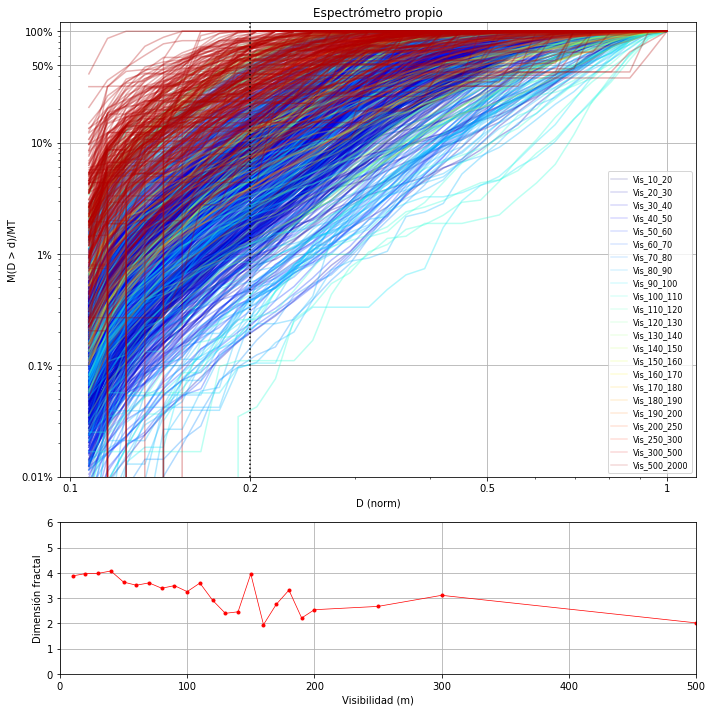

Visibilidad de 10 a 20 m
Pendiente de la recta de regresión: 3.881

Visibilidad de 20 a 30 m
Pendiente de la recta de regresión: 3.969

Visibilidad de 30 a 40 m
Pendiente de la recta de regresión: 3.98

Visibilidad de 40 a 50 m
Pendiente de la recta de regresión: 4.074

Visibilidad de 50 a 60 m
Pendiente de la recta de regresión: 3.635

Visibilidad de 60 a 70 m
Pendiente de la recta de regresión: 3.51

Visibilidad de 70 a 80 m
Pendiente de la recta de regresión: 3.603

Visibilidad de 80 a 90 m
Pendiente de la recta de regresión: 3.391

Visibilidad de 90 a 100 m
Pendiente de la recta de regresión: 3.494

Visibilidad de 100 a 110 m
Pendiente de la recta de regresión: 3.257

Visibilidad de 110 a 120 m
Pendiente de la recta de regresión: 3.596

Visibilidad de 120 a 130 m
Pendiente de la recta de regresión: 2.915

Visibilidad de 130 a 140 m
Pendiente de la recta de regresión: 2.397

Visibilidad de 140 a 150 m
Pendiente de la recta de regresión: 2.457

Visibilidad de 150 a 160 m
Pendiente de

In [34]:
# IMPLEMENTACIÓN MEJOR - albeit también chapucera // colores por visibilidad

l_v = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,250,300,500,2000] # límites rangos de visibilidad
a = len(l_v)
colors = pl.cm.jet(np.linspace(0,1,a))
alphas = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
pend = []
p_total = []

quiero = ['07', '08']

junio = ['05', '07', '08', '09', '10', '12', '13', '18', '19', '20', '21',
        '22', '23', '24']

propio = ['05', '07', '08', '09', '10', '12', '13', '18', '19', '20', '21',
        '22', '23', '24', '25', '26', '27', '35', '36']
alquiler = ['28', '29', '30', '31', '32', '33', '34']

julio = ['25', '26', '27']
agosto = ['28', '29', '30', '31', '32', '33', '34', '35', '36']
todos = ['05', '07', '08', '09', '10', '12', '13', '18', '19', '20', '21',
        '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
        '33', '34', '35', '36']


for i in range(len(procesados)):
    if ((nombres[i][6] == '8') & (nombres[i][8:10] in todos)): # cambiar selección de ensayos
        p_total.append(procesados[i])

p_total = pd.concat(p_total,ignore_index = True)
p_total = p_total.apply(lambda col:pd.to_numeric(col, errors='coerce'))
p_total = p_total.dropna()
p_total = p_total[p_total['Visibilidad corregida (m)'] != 0]
#p_total.reset_index(drop=True, inplace=True)

#p_total.to_csv(ruta_proces + 'database.csv')

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 1, height_ratios = [3, 1])
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

v = 0
while (v < len(l_v)-1):
    m = p_total.loc[(p_total["Visibilidad corregida (m)"] > l_v[v]) & (p_total["Visibilidad corregida (m)"] <= l_v[v+1])]
    # ^ rango de visibilidad
    ult_col = m.shape[1]-2
    #granos = np.array(procesados[j].iloc[:,3:ult_col])
    granos = np.array(m.iloc[0:m.shape[0],44:ult_col])
    densidad = np.empty((granos.shape[0],granos.shape[1]))
    masas = np.empty((granos.shape[0],granos.shape[1]))
    masas_ac = np.empty((granos.shape[0],granos.shape[1]))
    for k in range(granos.shape[0]):
        for l in range(granos.shape[1]):
            densidad[k,l] = (granos[k,l])*(1/dx[l+41])
    #maximo = np.max(densidad)

    for i in range(densidad.shape[0]):
        for k in range(densidad.shape[1]):
            masas[i,k] = (round((4/3)*densidad[i,k]*(3.141592/8)*(diams_g[k])**3,4)) # masa
            masas_ac[i] = np.cumsum(masas[i,:])

    for i in range(masas_ac.shape[0]):
        masas_ac[i] = (masas_ac[i])/max(masas_ac[i]) # suma de las masas de las partículas con un 
                                                     # diámetro menor que un cierto diámetro D

    interm = 0
    log_acumulado = np.log(masas_ac)
    if (log_acumulado.shape[0] != 0):
        for i in range(log_acumulado.shape[0]):
            pendiente, orden, r_value, p_value, std_err = stats.linregress(log_diamsg[9:11], log_acumulado[i][9:11]) #[4:25]
            interm = interm + pendiente
        pend.append(round((interm/(i+1)),3))
    else:
        pend.append(0)

    ax1.set_title('Espectrómetro propio')
    etiqueta = 'Vis_' + str(l_v[v]) + '_' + str(l_v[v+1])
    label_added = False
    for i in range(masas_ac.shape[0]):
        if not label_added:
            ax1.plot(diams_gnorm,masas_ac[i], color = colors[v], alpha = 0.15, label = etiqueta)
            label_added = True
        else:
            ax1.plot(diams_gnorm,masas_ac[i], color = colors[v], alpha = 0.3)
    #ax2.plot(x,pend*x + orden, color='red')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('D (norm)')
    ax1.set_ylabel('M(D > d)/MT')
    ax1.set_ylim(0.0001,1.2)
    ax1.legend(loc = "lower right", prop={'size': 8})
    ax1.set_xticks([0.1,0.2,0.5,1], minor=False)
    labels = [0.1,0.2,0.5,1]
    ax1.set_xticklabels(labels)
    ax1.set_yticks([0.0001,0.001,0.01,0.1,0.5,1], minor=False)
    labels = ['0.01%','0.1%','1%','10%','50%','100%']
    ax1.set_yticklabels(labels)
    ax1.grid(True)
    #plt.gca().invert_xaxis()
    #plt.gca().set_aspect('equal', adjustable='box') # misma escala en ambos ejes
    v = v+1
#ax1.axvline(x=diams_gnorm[4], linestyle = 'dotted', color = 'black')
#ax2.axvline(x=1158, linestyle = "dotted", color = "black", alpha = 0.5)
#ax2.axvline(x=1518, linestyle = "dotted", color = "black", alpha = 0.5)
ax1.axvline(x=0.2, linestyle = 'dotted', color = 'black')
l_v = np.array(l_v[0:len(l_v)-1])
pend = np.array(pend)
l_v = l_v[pend > 0]
pend = pend[pend > 0]
ax2.set_xlim(0,500)
ax2.set_ylim(0,6)
ax2.set_xlabel('Visibilidad (m)')
ax2.set_ylabel('Dimensión fractal')
ax2.plot(l_v,pend, color = 'red', linewidth = 0.7, marker = '.')
ax2.grid(True)
#ax2.set_xscale('log')
plt.tight_layout()
plt.show()

for vi in range(len(l_v)-1):
    if ((pend[vi] != 0)):
        print('Visibilidad de ' + str(l_v[vi]) + ' a ' + str(l_v[vi+1]) + ' m')
        print('Pendiente de la recta de regresión: ' + str(pend[vi]))
        print('')

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
<ipython-input-92-3a49c8bc775e>:72: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-92-3a49c8bc775e>:72: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-92-3a49c8bc775e>:72: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-92-3a49c8bc775e>:72: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)
<ipython-input-92-3a49c8bc775e>:72: RuntimeWarning: divide by zero encountered in log
  log_acumulado = np.log(masas_ac)


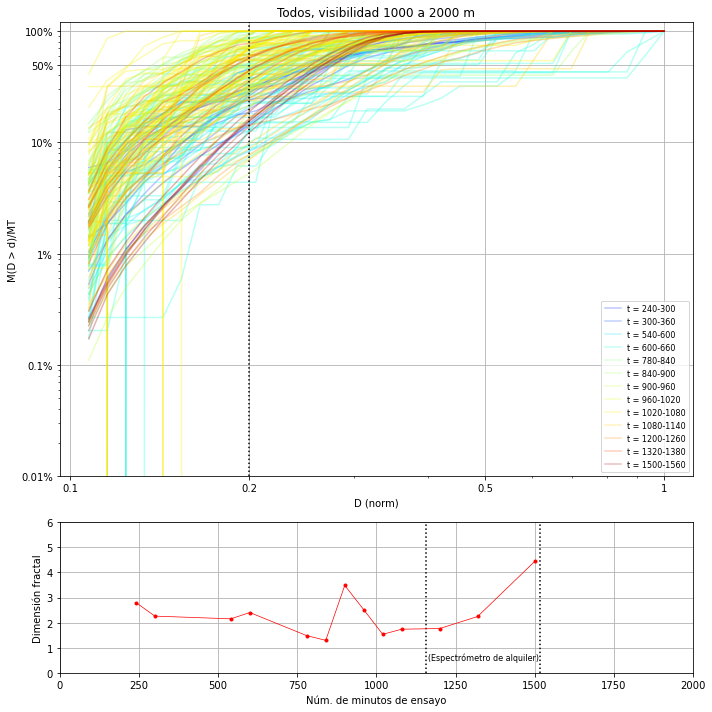

In [92]:
# IMPLEMENTACIÓN MEJOR - albeit también chapucera // colores por mes

mi = [0,60,120,180,240,300,360,420,480,540,600,660,720,780,840,900,960,1020,1080,1140,1200,1260,1320,1380,1440,1500,1560] # límites rangos de visibilidad
l_v = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,200,250,300,500,1000,2000]
#l_v = [10,20]
a = len(mi)
colors = pl.cm.jet(np.linspace(0,1,a))
alphas = [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
pend = []
p_total = []

quiero = ['07', '08']

propio = ['05', '07', '08', '09', '10', '12', '13', '18', '19', '20', '21',
        '22', '23', '24', '25', '26', '27', '35', '36']
alquiler = ['28', '29', '30', '31', '32', '33', '34']

junio = ['05', '07', '08', '09', '10', '12', '13', '18', '19', '20', '21',
        '22', '23', '24']
julio = ['25', '26', '27']
agosto = ['28', '29', '30', '31', '32', '33', '34', '35', '36']
todos = ['05', '07', '08', '09', '10', '12', '13', '18', '19', '20', '21',
        '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
        '33', '34', '35', '36']

#w = 0

for i in range(len(nombres)):
    if (nombres[i][6] == '8'): # cambiar selección de ensayos
        p_total.append(procesados[i])
        #if (nombres[i][8:10] in alquiler):
            

p_total = pd.concat(p_total,ignore_index = True)
p_total = p_total.apply(lambda col:pd.to_numeric(col, errors='coerce'))
p_total = p_total.dropna()
p_total = p_total.loc[(p_total["Visibilidad corregida (m)"] > l_v[w]) & (p_total["Visibilidad corregida (m)"] <= l_v[w+1])]
#p_total.reset_index(drop=True, inplace=True)

#p_total.to_csv(ruta_proces + 'database.csv')

fig = plt.figure(figsize=(10,10))
gs = gridspec.GridSpec(2, 1, height_ratios = [3, 1])
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])

v = 0
while (v < len(mi)-1):
    m = p_total.loc[(p_total.index > mi[v]) & (p_total.index <= mi[v+1])]
    # ^ rango de visibilidad
    ult_col = m.shape[1]-2
    #granos = np.array(procesados[j].iloc[:,3:ult_col])
    granos = np.array(m.iloc[0:m.shape[0],44:ult_col])
    densidad = np.empty((granos.shape[0],granos.shape[1]))
    masas = np.empty((granos.shape[0],granos.shape[1]))
    masas_ac = np.empty((granos.shape[0],granos.shape[1]))
    for k in range(granos.shape[0]):
        for l in range(granos.shape[1]):
            densidad[k,l] = (granos[k,l])*(1/dx[l+41])
    #maximo = np.max(densidad)

    for i in range(densidad.shape[0]):
        for k in range(densidad.shape[1]):
            masas[i,k] = (round((4/3)*densidad[i,k]*(3.141592/8)*(diams_g[k])**3,4)) # masa
            masas_ac[i] = np.cumsum(masas[i,:])

    for i in range(masas_ac.shape[0]):
        masas_ac[i] = (masas_ac[i])/max(masas_ac[i]) # suma de las masas de las partículas con un 
                                                     # diámetro menor que un cierto diámetro D

    interm = 0
    log_acumulado = np.log(masas_ac)
    if (log_acumulado.shape[0] != 0):
        for i in range(log_acumulado.shape[0]):
            pendiente, orden, r_value, p_value, std_err = stats.linregress(log_diamsg[9:11], log_acumulado[i][9:11]) #[4:23]
            interm = interm + pendiente                                                                              #[9:11]
        pend.append(round((interm/(i+1)),3))
    else:
        pend.append(0)

    ax1.set_title('Todos, visibilidad ' + str(l_v[w]) + ' a ' + str(l_v[w+1]) + ' m')
    etiqueta = 't = ' + str(mi[v]) + '-' + str(mi[v+1])
    label_added = False
    for i in range(masas_ac.shape[0]):
        if not label_added:
            ax1.plot(diams_gnorm,masas_ac[i], color = colors[v], alpha = 0.25, label = etiqueta)
            label_added = True
        else:
            ax1.plot(diams_gnorm,masas_ac[i], color = colors[v], alpha = 0.3)
    #ax2.plot(x,pend*x + orden, color='red')
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlabel('D (norm)')
    ax1.set_ylabel('M(D > d)/MT')
    ax1.set_ylim(0.0001,1.2)
    ax1.legend(loc = "lower right", prop={'size': 8})
    ax1.set_xticks([0.1,0.2,0.5,1], minor=False)
    labels = [0.1,0.2,0.5,1]
    ax1.set_xticklabels(labels)
    ax1.set_yticks([0.0001,0.001,0.01,0.1,0.5,1], minor=False)
    labels = ['0.01%','0.1%','1%','10%','50%','100%']
    ax1.set_yticklabels(labels)
    ax1.grid(True)
    #plt.gca().invert_xaxis()
    #plt.gca().set_aspect('equal', adjustable='box') # misma escala en ambos ejes
    v = v+1
#ax1.axvline(x=diams_gnorm[4], linestyle = 'dotted', color = 'black')
ax2.axvline(x=1158, linestyle = "dotted", color = "black", alpha = 1)
ax2.axvline(x=1518, linestyle = "dotted", color = "black", alpha = 1)
ax1.axvline(x=0.2, linestyle = 'dotted', color = 'black')
ax2.annotate(text = '(Espectrómetro de alquiler)', xy = (1163,0.5), size = 8)
mi = np.array(mi[0:len(mi)-1])
pend = np.array(pend)
mi = mi[pend > 0]
pend = pend[pend > 0]
ax2.set_xlim(0,2000)
ax2.set_ylim(0,6)
ax2.set_xlabel('Núm. de minutos de ensayo')
ax2.set_ylabel('Dimensión fractal')
ax2.plot(mi,pend, color = 'red', linewidth = 0.7, marker = '.')
ax2.grid(True)
#ax2.set_xscale('log')
plt.tight_layout()
plt.show()

#for vi in range(len(mi)-1):
#    if ((pend[vi] != 0)):
#        print('Visibilidad de ' + str(mi[vi]) + ' a ' + str(mi[vi+1]) + ' m')
#        print('Pendiente de la recta de regresión: ' + str(pend[vi]))
#        print('')

In [ ]:
w = 19